In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
total

Category    0
Message     0
dtype: int64

In [ ]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


**Data Cleaning and Preprocessing**

In [ ]:
df=df.where((pd.notnull(df)),"")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.loc[df['Category']=='spam','Category']=0
df.loc[df['Category']=='ham','Category']=1

In [ ]:
df['Category'].value_counts()

1    4825
0     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

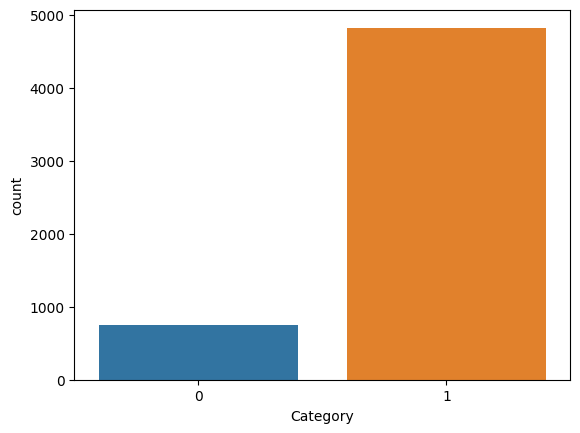

In [ ]:
sns.countplot(x=df['Category'])

0       76
1       21
2       99
3       35
4       36
        ..
5567    78
5568    21
5569    17
5570    64
5571    14
Name: message_len, Length: 5572, dtype: int64


<Axes: xlabel='message_len', ylabel='Density'>

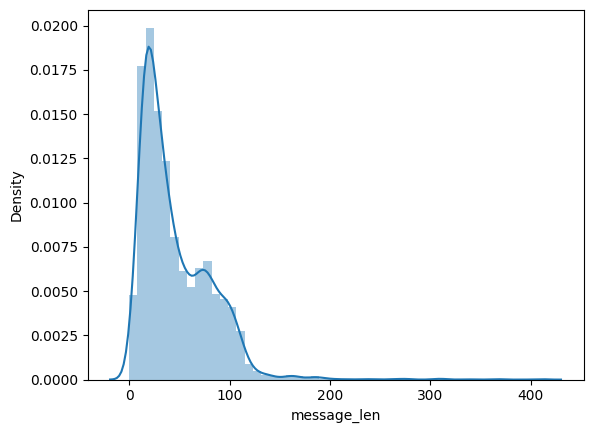

In [ ]:
df['message_len']=df['Message'].str.len()
print(df['message_len'])
sns.distplot(df['message_len'])

**Stemming**

In [ ]:
from nltk.stem.porter import PorterStemmer
p_stemmer=PorterStemmer()

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re
def stemming(content):
  s_content= re.sub('[^a-zA-Z]',' ',content)
  s_content=s_content.lower()
  s_content=s_content.split()
  s_content = [p_stemmer.stem(word) for word in s_content if not word in stopwords.words('english')]
  s_content=' '.join(s_content)
  return s_content

In [ ]:
df['Message']=df['Message'].apply(stemming)

In [ ]:
df['Message']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

**Model Building**

In [ ]:
X=df['Message']
y=df['Category']

In [ ]:
y=y.astype('int')

Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
vec.fit(X)
X=vec.transform(X)

**Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(5572, 6247) (4457, 6247) (1115, 6247)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(5572,) (4457,) (1115,)


**Training and Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models=[LogisticRegression , SVC , DecisionTreeClassifier , RandomForestClassifier]
accuracy_s=[]
precision_s=[]
recall_s=[]
f1_s=[]


for model in models:
   classifier = model().fit(X_train, y_train)
   y_pred = classifier.predict(X_test)

   accuracy_s.append(accuracy_score(y_test,y_pred))
   precision_s.append(precision_score(y_test,y_pred))
   recall_s.append(recall_score(y_test,y_pred))
   f1_s.append(f1_score(y_test,y_pred))

In [ ]:
df_classification_metrics = pd.DataFrame({
    "Model": ["Logistic Regression","SVM","Decision Tree","Random Forest"],
    "Accuracy":accuracy_s,
    "Precision":precision_s,
    "Recall":recall_s,
    "F1 Score":f1_s
})
df_classification_metrics.set_index('Model',inplace=True)
df_classification_metrics

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.967713,0.966867,0.996894,0.981651
SVM,0.985650,0.985685,0.997930,0.991770
Decision Tree,0.974888,0.990586,0.980331,0.985432
Random Forest,0.982960,0.984647,0.995859,0.990221
